In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import distributions as dist
import random

In [53]:
n=200
random.seed(123)

x=np.random.uniform(0, 300, n)
x=x[np.argsort(x)]
y_true=5+ x**1 + x**2 + x**3

random.seed(123)
y_obs=y_true +np.random.normal(0, 900000, n)

X=np.c_[np.ones(n),x ,x**2, x**3, x**4, x**5]

In [54]:
X

array([[1.00000000e+00, 5.34666698e+00, 2.85868478e+01, 1.52844355e+02,
        8.17207869e+02, 4.36933833e+03],
       [1.00000000e+00, 5.38173941e+00, 2.89631190e+01, 1.55871959e+02,
        8.38862264e+02, 4.51453810e+03],
       [1.00000000e+00, 1.03084978e+01, 1.06265127e+02, 1.09543383e+03,
        1.12922772e+04, 1.16406415e+05],
       ...,
       [1.00000000e+00, 2.98272082e+02, 8.89662349e+04, 2.65361441e+07,
        7.91499095e+09, 2.36082083e+12],
       [1.00000000e+00, 2.99055766e+02, 8.94343512e+04, 2.67458584e+07,
        7.99850317e+09, 2.39199849e+12],
       [1.00000000e+00, 2.99829511e+02, 8.98977359e+04, 2.69539942e+07,
        8.08160292e+09, 2.42310305e+12]])

In [92]:
I=np.eye(6)
I[0,0]=0
λ=10

theta= np.linalg.inv(X.T.dot(X)+ λ*I).dot(X.T).dot(y_obs)
theta

array([-3.33260435e+05,  3.45555762e+04, -7.56062351e+02,  7.28533922e+00,
       -2.20042424e-02,  2.74370145e-05])

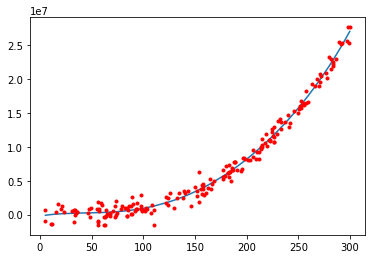

In [91]:
plt.plot(x,theta[0] + theta[1]*x + theta[2]*x**2 + theta[3]*x**3 +theta[4]*x**4 + theta[5]*x**5 )
plt.plot(x,y_obs,'.', color='red')
plt.show()

In [115]:
x_train=x[x < 200]
x_test=x[x >= 200]

y_train= y_true[x < 200]
y_test=y_true[x >= 200]

n_train=len(x_train)
n_test=len(x_test)

In [123]:
x_mean=np.mean(x_train)
y_mean=np.mean(y_train)
X_mean=np.mean(x_test)
Y_mean=np.mean(y_test)
a=0; d=0
b=0; e=0

In [132]:
for i in range(len(x_train)):
    a += (x_train[i]-x_mean)*(y_train[i]-y_mean)
    b += (x_train[i]-x_mean**2)
    
  
    
mean1= a/b
c1=y_mean-mean1*x_mean

print(mean1,c1)

-10218.40178902446 3343558.1251196656


In [133]:
for i in range(len(x_test)):
    d += (x_test[i]-X_mean)*(y_test[i]-Y_mean)
    e += (x_test[i]-X_mean**2)
    
mean2=d/e
c2=Y_mean-mean2*X_mean

print(mean2,c2)

-8970.110121384889 17935119.991858818


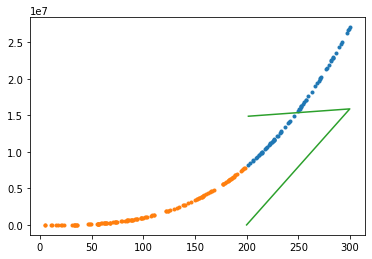

In [176]:
y_pred = mean1* x_test + c2
λ1=0.5
λ2=200
plt.plot(x_test,y_test,'.')
plt.plot(x_train,y_train,'.')
plt.plot([min(x_test),max(x_test),λ2], [min(y_pred), max(y_pred),λ2])
plt.show()

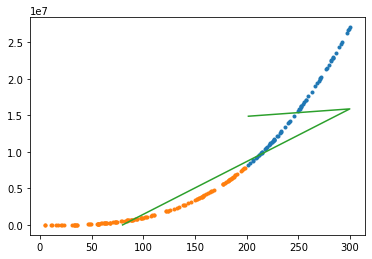

In [177]:
λ1=80
plt.plot(x_test,y_test,'.')
plt.plot(x_train,y_train,'.')
plt.plot([min(x_test),max(x_test),λ1], [min(y_pred), max(y_pred),λ1])
plt.show()